In [1]:
import pandas as pd
import joblib
import seaborn as sns
import warnings;warnings.simplefilter('ignore')
import os 
root = '../data/phase_2/cleaned/'
os.listdir(root)

['col_names.pkl', 'train(energy).csv', 'train.csv']

In [2]:
def get_col(df,name):
    return df.columns[df.columns.str.contains(name)].tolist()

In [3]:
col_names = joblib.load(root+'col_names.pkl')

In [4]:
col_names.keys()

dict_keys(['xna', 'xle', 'xhc', 'xhe', 'fna', 'fle', 'fhc', 'fhe', 'sle', 'shc', 'she', 'case', 'duty', 'Rate_m3', 'Rate_ton'])

In [5]:
df = pd.read_csv(root+'train(energy).csv',index_col=0)
df.head()

,Case Conditions_Feed Rate to C013 (Input)_m3/hr,Case Conditions_Heart Cut Prod. Rate (Input)_m3/hr,Case Conditions_C6P- in Heart Cut (Input)_wt%,Case Conditions_C7+ in Light End (Input)_wt%,Naphtha Properties_Oxygen_wt%,Naphtha Properties_Methane_wt%,Naphtha Properties_Ethane_wt%,Naphtha Properties_Propane_wt%,Naphtha Properties_n-Butane_wt%,Naphtha Properties_i-Pentane_wt%,...,Duty_Condenser Heat Duty_Mkcal/hr,Duty_Reboiler Heat Duty_Mkcal/hr,Naphtha Properties_Naphtha Feed Rate_m3/hr,Light End Product Properties_Light End Prod. Rate_m3/hr,Heart Cut Product Properties_Heart Cut Prod. Rate_m3/hr,Heavy End Product Properties_Heavy End Product Rate_m3/hr,Naphtha Properties_Naphtha Feed Rate_ton/hr,Light End Product Properties_Light End Prod. Rate_ton/hr,Heart Cut Product Properties_Heart Cut Prod. Rate_ton/hr,Heavy End Product Properties_Heavy End Product Rate_ton/hr
001-01,10.0,100.0,1.0,2.5,0.0,0.0,0.0,0.002,0.003,0.025999,...,3.891577,4.252277,118.000084,7.997900,100.000198,10.001979,86.475102,5.469008,73.401711,7.604384
001-02,10.0,100.0,1.0,5.0,0.0,0.0,0.0,0.002,0.003,0.025999,...,3.723144,4.071568,118.000000,8.445992,100.000122,9.553886,86.475047,5.797086,73.411102,7.266858
001-03,10.0,100.0,1.0,10.0,0.0,0.0,0.0,0.002,0.003,0.025999,...,3.572479,3.900158,118.000000,9.143384,100.000008,8.856608,86.475047,6.294930,73.435539,6.744582
001-04,10.0,100.0,1.5,2.5,0.0,0.0,0.0,0.002,0.003,0.025999,...,3.442118,3.759819,118.000000,7.284074,100.000275,10.715655,86.475047,4.978351,73.360406,8.136289
001-05,10.0,100.0,1.5,5.0,0.0,0.0,0.0,0.002,0.003,0.025999,...,3.301176,3.607212,118.000084,7.697134,99.999817,10.303131,86.475102,5.280904,73.370414,7.823788


In [6]:
density = df[col_names['Rate_ton']].values/df[col_names['Rate_m3']].values
density = pd.DataFrame(density,columns=['NA_density','LE_density','HC_density','HE_density'],index=df.index)
density.head()

,NA_density,LE_density,HC_density,HE_density
001-01,0.732839,0.683806,0.734016,0.760288
001-02,0.732839,0.686371,0.734110,0.760618
001-03,0.732839,0.688468,0.734355,0.761531
001-04,0.732839,0.683457,0.733602,0.759290
001-05,0.732839,0.686087,0.733705,0.759360


In [7]:
duty = df[col_names['duty']]
duty.head()

,Duty_E062 3.5K Steam Rate_ton/hr,Duty_Condenser Heat Duty_Mkcal/hr,Duty_Reboiler Heat Duty_Mkcal/hr
001-01,2.280675,3.891577,4.252277
001-02,2.280843,3.723144,4.071568
001-03,2.280798,3.572479,3.900158
001-04,2.280843,3.442118,3.759819
001-05,2.280675,3.301176,3.607212


In [8]:
xna = df[col_names['xna']]
xna.head()

,Naphtha Properties_Oxygen_wt%,Naphtha Properties_Methane_wt%,Naphtha Properties_Ethane_wt%,Naphtha Properties_Propane_wt%,Naphtha Properties_n-Butane_wt%,Naphtha Properties_i-Pentane_wt%,Naphtha Properties_n-Pentane_wt%,Naphtha Properties_tr2-Pentene_wt%,Naphtha Properties_Cyclopentane_wt%,Naphtha Properties_3-Methylpentane_wt%,...,"Naphtha Properties_2,2,3,3-Tetramethylhexane_wt%",Naphtha Properties_3-Methylnonane_wt%,Naphtha Properties_tert-Butylcyclohexane_wt%,Naphtha Properties_n-Decane_wt%,"Naphtha Properties_1,2-Diethylbenzene_wt%",Naphtha Properties_n-Undecane_wt%,Naphtha Properties_n-Pentylbenzene_wt%,Naphtha Properties_n-Dodecane_wt%,Naphtha Properties_n-Hexylbenzene_wt%,Naphtha Properties_n-Tridecane_wt%
001-01,0.0,0.0,0.0,0.002,0.003,0.025999,0.073999,0.001,0.013,1.365973,...,1.387972,3.239935,0.574988,1.168977,0.753985,0.220996,0.043999,0.004,0.008,0.0
001-02,0.0,0.0,0.0,0.002,0.003,0.025999,0.073999,0.001,0.013,1.365973,...,1.387972,3.239935,0.574988,1.168977,0.753985,0.220996,0.043999,0.004,0.008,0.0
001-03,0.0,0.0,0.0,0.002,0.003,0.025999,0.073999,0.001,0.013,1.365973,...,1.387972,3.239935,0.574988,1.168977,0.753985,0.220996,0.043999,0.004,0.008,0.0
001-04,0.0,0.0,0.0,0.002,0.003,0.025999,0.073999,0.001,0.013,1.365973,...,1.387972,3.239935,0.574988,1.168977,0.753985,0.220996,0.043999,0.004,0.008,0.0
001-05,0.0,0.0,0.0,0.002,0.003,0.025999,0.073999,0.001,0.013,1.365973,...,1.387972,3.239935,0.574988,1.168977,0.753985,0.220996,0.043999,0.004,0.008,0.0


In [9]:
df = xna.join(duty).join(density)
df.head()

,Naphtha Properties_Oxygen_wt%,Naphtha Properties_Methane_wt%,Naphtha Properties_Ethane_wt%,Naphtha Properties_Propane_wt%,Naphtha Properties_n-Butane_wt%,Naphtha Properties_i-Pentane_wt%,Naphtha Properties_n-Pentane_wt%,Naphtha Properties_tr2-Pentene_wt%,Naphtha Properties_Cyclopentane_wt%,Naphtha Properties_3-Methylpentane_wt%,...,Naphtha Properties_n-Dodecane_wt%,Naphtha Properties_n-Hexylbenzene_wt%,Naphtha Properties_n-Tridecane_wt%,Duty_E062 3.5K Steam Rate_ton/hr,Duty_Condenser Heat Duty_Mkcal/hr,Duty_Reboiler Heat Duty_Mkcal/hr,NA_density,LE_density,HC_density,HE_density
001-01,0.0,0.0,0.0,0.002,0.003,0.025999,0.073999,0.001,0.013,1.365973,...,0.004,0.008,0.0,2.280675,3.891577,4.252277,0.732839,0.683806,0.734016,0.760288
001-02,0.0,0.0,0.0,0.002,0.003,0.025999,0.073999,0.001,0.013,1.365973,...,0.004,0.008,0.0,2.280843,3.723144,4.071568,0.732839,0.686371,0.734110,0.760618
001-03,0.0,0.0,0.0,0.002,0.003,0.025999,0.073999,0.001,0.013,1.365973,...,0.004,0.008,0.0,2.280798,3.572479,3.900158,0.732839,0.688468,0.734355,0.761531
001-04,0.0,0.0,0.0,0.002,0.003,0.025999,0.073999,0.001,0.013,1.365973,...,0.004,0.008,0.0,2.280843,3.442118,3.759819,0.732839,0.683457,0.733602,0.759290
001-05,0.0,0.0,0.0,0.002,0.003,0.025999,0.073999,0.001,0.013,1.365973,...,0.004,0.008,0.0,2.280675,3.301176,3.607212,0.732839,0.686087,0.733705,0.759360


In [10]:
df.corr().iloc[:-6,-6:].style.background_gradient(axis=1)

,Duty_Condenser Heat Duty_Mkcal/hr,Duty_Reboiler Heat Duty_Mkcal/hr,NA_density,LE_density,HC_density,HE_density
Naphtha Properties_Oxygen_wt%,nan,nan,nan,nan,nan,nan
Naphtha Properties_Methane_wt%,nan,nan,nan,nan,nan,nan
Naphtha Properties_Ethane_wt%,nan,nan,nan,nan,nan,nan
Naphtha Properties_Propane_wt%,0.383004,0.223728,-0.0490178,-0.504519,0.21769,0.130974
Naphtha Properties_n-Butane_wt%,0.383559,0.223348,-0.0481397,-0.505249,0.219484,0.131993
Naphtha Properties_i-Pentane_wt%,0.383588,0.223364,-0.0483179,-0.505278,0.219283,0.132011
Naphtha Properties_n-Pentane_wt%,0.399647,0.233283,-0.0694662,-0.504711,0.203493,0.105855
Naphtha Properties_tr2-Pentene_wt%,0.371353,0.216369,-0.0524212,-0.47057,0.20119,0.116716
Naphtha Properties_Cyclopentane_wt%,0.394886,0.228263,-0.0768612,-0.236975,0.16312,0.0209586
Naphtha Properties_3-Methylpentane_wt%,0.474361,0.325965,-0.258547,-0.3473,0.00509002,-0.0633198


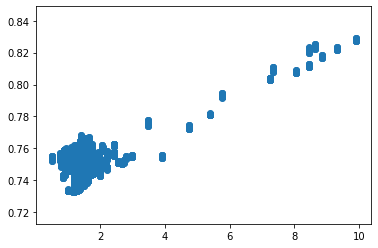

In [11]:
import matplotlib.pyplot as plt
x = df['Naphtha Properties_EthylBenzene_wt%']
y = df['HC_density']
plt.scatter(x,y)

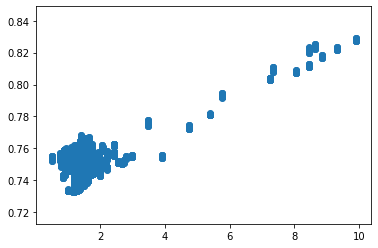

In [12]:
x = df['Naphtha Properties_EthylBenzene_wt%']
y = df['HC_density']
plt.scatter(x,y)